Homeownership rate analysis 1984-2018
objective: find the homeownership rate from 1984-2018, compare peak with 2008 crisis

In [ ]:
# load dataset from kagglehub
import kagglehub
path=kagglehub.dataset_download("census/homeownership-rate-time-series-collection")
print('Path to dataset files:',path)
import pandas as pd 
import os 
folder_path = r"C:/Users/ahliy/Downloads/homeowners"
print(os.path.exists(folder_path))
print(os.listdir(folder_path)) 
file_name="NYHOWN.csv"
file_path = os.path.join(folder_path, r"C:\Users\ahliy\Downloads\homeowners\NYHOWN.csv")


Path to dataset files: C:\Users\ahliy\.cache\kagglehub\datasets\census\homeownership-rate-time-series-collection\versions\57
True
['AZHOWN.csv', 'CAHOWN.csv', 'COHOWN.csv', 'FLHOWN.csv', 'HIHOWN.csv', 'homeownership-rate-for-arizona_metadata.json', 'homeownership-rate-for-baltimore-city-md_metadata.json', 'homeownership-rate-for-california_metadata.json', 'homeownership-rate-for-colorado_metadata.json', 'homeownership-rate-for-cook-county-il_metadata.json', 'homeownership-rate-for-dallas-county-tx_metadata.json', 'homeownership-rate-for-denver-county-co_metadata.json', 'homeownership-rate-for-florida_metadata.json', 'homeownership-rate-for-hawaii_metadata.json', 'homeownership-rate-for-illinois_metadata.json', 'homeownership-rate-for-king-county-wa_metadata.json', 'homeownership-rate-for-los-angeles-county-ca_metadata.json', 'homeownership-rate-for-massachusetts_metadata.json', 'homeownership-rate-for-miami-dade-county-fl_metadata.json', 'homeownership-rate-for-michigan_metadata.json',

In [ ]:
# load the csv file into a pandas dataframe
# read the csv file 
df = pd.read_csv(file_path)
df = df.fillna(0) 
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
print(df.columns)
print(df.duplicated().sum())
df= df.drop_duplicates()
print(df.nunique())


  realtime_start realtime_end        date  value
0     2019-12-06   2019-12-06  1984-01-01   51.1
1     2019-12-06   2019-12-06  1985-01-01   50.3
2     2019-12-06   2019-12-06  1986-01-01   51.3
3     2019-12-06   2019-12-06  1987-01-01   52.0
4     2019-12-06   2019-12-06  1988-01-01   50.7
   realtime_start realtime_end        date  value
30     2019-12-06   2019-12-06  2014-01-01   52.9
31     2019-12-06   2019-12-06  2015-01-01   51.5
32     2019-12-06   2019-12-06  2016-01-01   51.5
33     2019-12-06   2019-12-06  2017-01-01   51.1
34     2019-12-06   2019-12-06  2018-01-01   51.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  35 non-null     object 
 1   realtime_end    35 non-null     object 
 2   date            35 non-null     object 
 3   value           35 non-null     float64
dtypes: float64(1), object(3)
memo

In [ ]:
#convert the date columns into datetime format
df['realtime_start']=pd.to_datetime(df['realtime_start'])
df['realtime_end']=pd.to_datetime(df['realtime_end'])
df['date']=pd.to_datetime(df['date'])
print(df.dtypes)
df=df.sort_values('date')
print(df[['date', 'value']].head())
print(df[['date', 'value']].tail())
df['date']=df['date'].dt.year
df['year'] = df['date'].apply(lambda x: int(str(x)[-4:]))
print(df[['date','year']].head())

realtime_start    datetime64[ns]
realtime_end      datetime64[ns]
date              datetime64[ns]
value                    float64
dtype: object
        date  value
0 1984-01-01   51.1
1 1985-01-01   50.3
2 1986-01-01   51.3
3 1987-01-01   52.0
4 1988-01-01   50.7
         date  value
30 2014-01-01   52.9
31 2015-01-01   51.5
32 2016-01-01   51.5
33 2017-01-01   51.1
34 2018-01-01   51.0
   date  year
0  1984  1984
1  1985  1985
2  1986  1986
3  1987  1987
4  1988  1988


In [ ]:
# find the yearly trend of homeownership rates
yearly_trend=df.groupby('date')['value'].mean()
print(yearly_trend)
df['date'] = pd.to_datetime(df['date'])
df.dtypes
housing_2008=df[(df['year']>=2006)&(df['year']<=2012)]
peak_row=df.loc[df['value'].idxmax()]
print(peak_row)
housing_2008['value'].describe()
drop_2008=housing_2008['value'].max()-housing_2008['value'].min()
print('2008 crisis drop:',drop_2008)
drop_from_peak_to_2008=peak_row['value']-housing_2008['value'].min()
print('drop from peak to 2008 crisis:',drop_from_peak_to_2008)

date
1984    51.1
1985    50.3
1986    51.3
1987    52.0
1988    50.7
1989    52.3
1990    53.3
1991    52.6
1992    53.3
1993    52.8
1994    52.5
1995    52.7
1996    52.7
1997    52.6
1998    52.8
1999    52.8
2000    53.4
2001    53.9
2002    54.8
2003    54.3
2004    54.8
2005    55.9
2006    55.7
2007    55.9
2008    55.0
2009    54.4
2010    54.5
2011    53.6
2012    53.6
2013    53.0
2014    52.9
2015    51.5
2016    51.5
2017    51.1
2018    51.0
Name: value, dtype: float64
realtime_start              2019-12-06 00:00:00
realtime_end                2019-12-06 00:00:00
date              1970-01-01 00:00:00.000002005
value                                      55.9
year                                       2005
Name: 21, dtype: object
2008 crisis drop: 2.299999999999997
drop from peak to 2008 crisis: 2.299999999999997


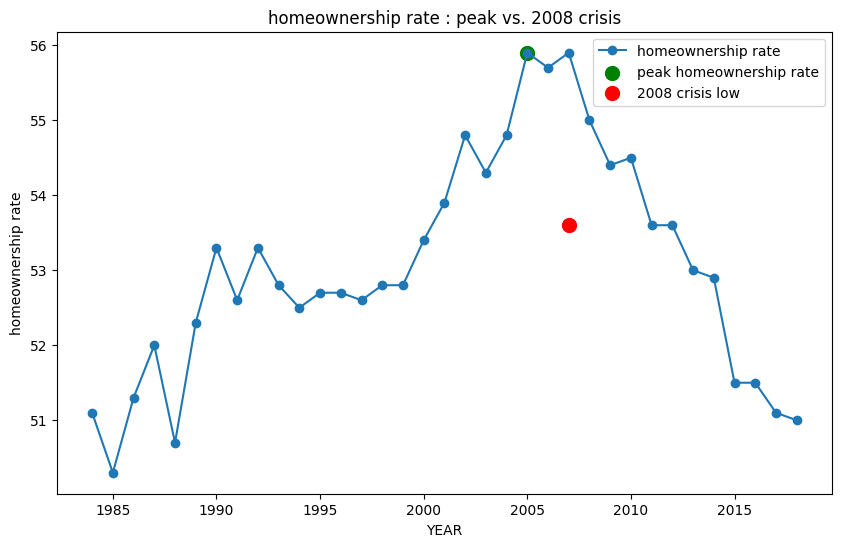

In [ ]:
# create a plot to visualize the peak homeownerhsip vs 2008 crisis
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['year'],df['value'],label='homeownership rate',marker='o')
plt.scatter(peak_row['year'],peak_row['value'],color='green',s=100,label='peak homeownership rate')
plt.scatter(housing_2008.loc[housing_2008['value'].idxmax()]['year'],housing_2008['value'].min(),color='red',s=100,label='2008 crisis low')
plt.legend()
plt.xlabel('YEAR')
plt.ylabel('homeownership rate')
plt.title('homeownership rate : peak vs. 2008 crisis')
plt.show()


in conclusion, this plot compares the rates of homeownership and the crisis of 2008 showcasing the difference in the rates of homeownership from an average over  multiple decades and low point in american history.